In [1]:
import pandas as pd
df = pd.read_pickle('../data/visits.pkl')

In [2]:
def create_list(row):
    if row:
        if row['savedCalls']:
            return row['savedCalls']
    return [{}]

df_exploded = df.copy()
df_exploded['apis'] = df_exploded['apis'].map(lambda x: create_list(x))
df_exploded = df_exploded.explode('apis')

df_filtered = df_exploded.drop(['finalUrl', 'cmps', 'requests', 'cookies', 'targets'], axis=1)

display(df_filtered)

,initialUrl,apis,autoconsent_action
0,http://tradplusad.com/,{},optIn
1,http://alexa.com/,{},optIn
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn
...,...,...,...
9615,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut
9616,http://sothebys.com/,{},optOut
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut


In [3]:
df_object_types = df_filtered.copy()

object_types = [
    '[object Blob]',
    '[object FormData]',
    '[object Object]',
    '[object SVGSVGElement]',
    '[object SVGPathElement]',
    '[object HTMLSpanElement]',
    '[object HTMLButtonElement]',
    '[object SVGPathElement]',
    '[object HTMLDivElement]',
    '[object HTMLImageElement]',
    '[object Text]',
    '[object HTMLLIElement]',
    '[object HTMLUListElement]',
    '[object HTMLHeadingElement]',
    '[object HTMLParagraphElement]',
    '[object HTMLIFrameElement]',
    '[object HTMLInputElement]',
    '[object HTMLScriptElement]',
    '[object HTMLLinkElement]',
    '[object HTMLMetaElement]',
    '[object HTMLElement]',
    '[object HTMLStyleElement]',
    '[object HTMLObjectElement]',
    '[object HTMLHeadElement]',
    '[object CustomEvent]',
    '[object Comment]',
    '[object HTMLFieldSetElement]',
    '[object HTMLTrackElement]',
    '[object HTMLOptionElement]',
    '[object HTMLVideoElement]',
    '[object DocumentFragment]',
    '[object HTMLTableElement]',
    '[object HTMLTableRowElement]',
    '[object HTMLSourceElement]',
    '[object HTMLPictureElement]',
    '[object HTMLBodyElement]',
    ]

def argument_contains(row, object_string):
    if row['apis'] == {}:
        return False
    arguments = row['apis']['arguments']
    for argument in arguments:
        if argument == object_string:
            return True
    return False

for object_type in object_types:
    df_object_types[object_type] = df_object_types.apply(lambda x: argument_contains(x, object_type), axis=1)

display(df_object_types)

,initialUrl,apis,autoconsent_action,[object Blob],[object FormData],[object Object],[object SVGSVGElement],[object SVGPathElement],[object HTMLSpanElement],[object HTMLButtonElement],...,[object HTMLFieldSetElement],[object HTMLTrackElement],[object HTMLOptionElement],[object HTMLVideoElement],[object DocumentFragment],[object HTMLTableElement],[object HTMLTableRowElement],[object HTMLSourceElement],[object HTMLPictureElement],[object HTMLBodyElement]
0,http://tradplusad.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,http://alexa.com/,{},optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://cf.bstatic.com/static/js/m...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,http://bstatic.com/,{'source': 'https://www.googletagmanager.com/g...,optIn,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9615,http://qortex.ai/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9616,http://sothebys.com/,{},optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9617,http://mozilla.org/,{'source': 'https://www.googletagmanager.com/g...,optOut,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# - nr sendBeacon calls containing object

nr_calls_containing_object_optIn = []
nr_calls_containing_object_optOut = []

for object_type in object_types:
    nr_calls_containing_object_optIn.append(df_object_types[df_object_types['autoconsent_action'] == 'optIn'][object_type].values.sum())
    nr_calls_containing_object_optOut.append(df_object_types[df_object_types['autoconsent_action'] == 'optOut'][object_type].values.sum())

# - nr of visits containing any object

def contains_any_object(frame):
    for object_type in object_types:
        if True in frame[object_type].values:
            return True
    return False

nr_objects_optIn = df_object_types[df_object_types['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: contains_any_object(frame)).sum()
nr_objects_optOut = df_object_types[df_object_types['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: contains_any_object(frame)).sum()

print("optIn has: " + str(nr_objects_optIn) + " visits containing objects")
print("optOut has: " + str(nr_objects_optOut) + " visits containing objects")

# - nr of visits containing each object type

object_counts_optIn = [0]*len(object_types)
object_counts_optOut = [0]*len(object_types)

def get_object_counts(frame, object_counts):
    for i, object_type in enumerate(object_types):
        if True in frame[object_type].values:
            object_counts[i] += 1

df_object_types[df_object_types['autoconsent_action'] == 'optIn'].groupby(['initialUrl']).apply(lambda frame: get_object_counts(frame, object_counts_optIn))
df_object_types[df_object_types['autoconsent_action'] == 'optOut'].groupby(['initialUrl']).apply(lambda frame: get_object_counts(frame, object_counts_optOut))

print(object_counts_optIn)
print(object_counts_optOut)

optIn has: 1671 visits containing objects
optOut has: 1450 visits containing objects
[1515, 180, 30, 2, 1, 4, 3, 1, 5, 4, 4, 1, 2, 2, 3, 4, 4, 6, 2, 3, 3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1308, 160, 28, 2, 1, 6, 3, 1, 6, 3, 4, 0, 0, 2, 3, 6, 4, 5, 1, 2, 3, 4, 1, 1, 1, 3, 3, 0, 1, 0, 2, 0, 0, 1, 1, 1]


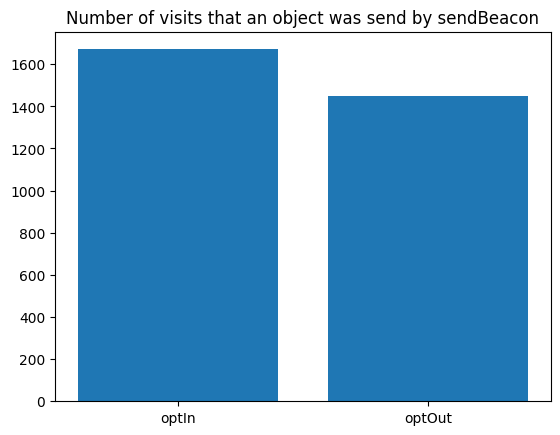

In [5]:
import matplotlib.pyplot as plt
import numpy as np

sums = [nr_objects_optIn, nr_objects_optOut]
labels = ['optIn', 'optOut']
plt.bar(labels, sums)
plt.title("Number of visits that an object was send by sendBeacon")
plt.show()

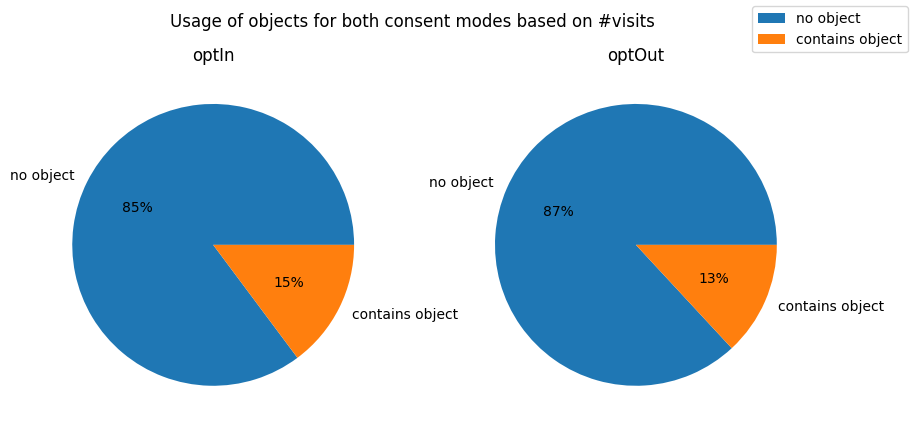

In [6]:
count_optIn = df.autoconsent_action.value_counts()['optIn']
count_optOut = df.autoconsent_action.value_counts()['optOut']

fig, ax = plt.subplots(1, 2)
ax[0].pie([count_optIn, nr_objects_optIn], autopct='%.0f%%', labels=['no object', 'contains object'])
ax[0].set_title("optIn")
ax[1].pie([count_optOut, nr_objects_optOut], autopct='%.0f%%', labels=['no object', 'contains object'])
ax[1].set_title("optOut")

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Usage of objects for both consent modes based on #visits")
fig.set_figwidth(10)
plt.show()


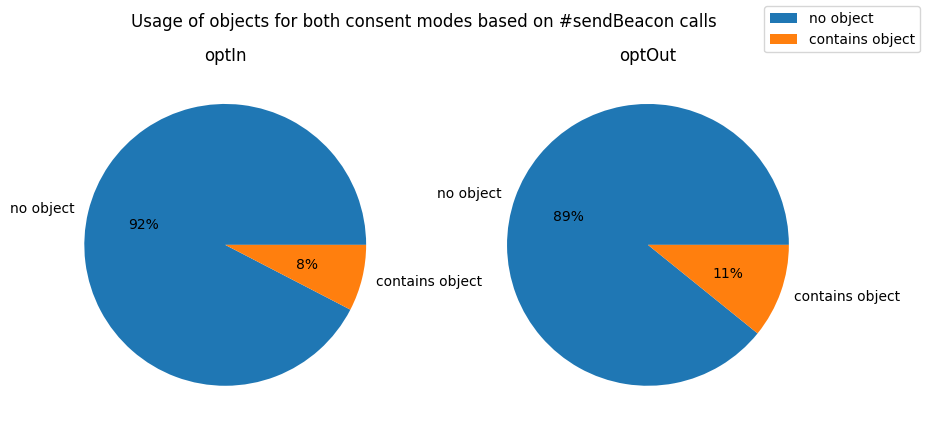

In [7]:
count_optIn = len(df_object_types[df_object_types['autoconsent_action'] == 'optIn'])
count_optOut = len(df_object_types[df_object_types['autoconsent_action'] == 'optOut'])

fig, ax = plt.subplots(1, 2)
ax[0].pie([count_optIn, sum(nr_calls_containing_object_optIn)], autopct='%.0f%%', labels=['no object', 'contains object'])
ax[0].set_title("optIn")
ax[1].pie([count_optOut, sum(nr_calls_containing_object_optOut)], autopct='%.0f%%', labels=['no object', 'contains object'])
ax[1].set_title("optOut")

handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle("Usage of objects for both consent modes based on #sendBeacon calls")
fig.set_figwidth(10)
plt.show()

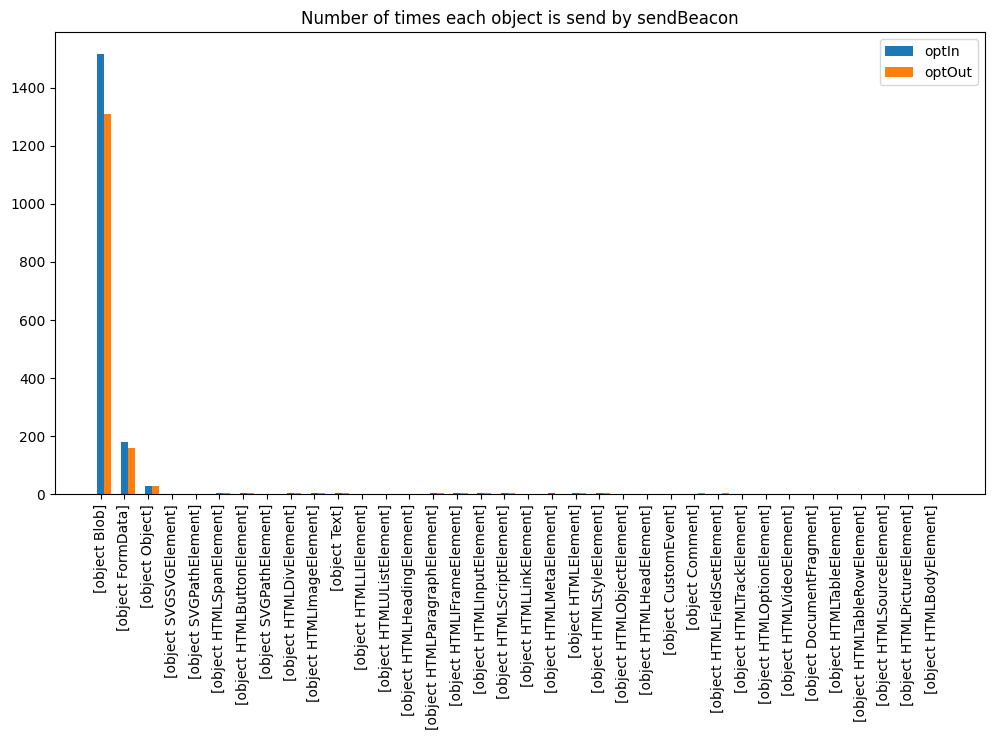

In [8]:
labels = [l[1:-1] for l in object_types]
ind = np.arange(len(object_types))
width = 0.3

plt.figure(figsize=(12,6))
plt.title("Number of times each object is send by sendBeacon")
plt.xticks(ind + width/2, object_types, rotation=90)
plt.bar(ind, object_counts_optIn, width, align='edge', data='height', label='optIn')
plt.bar(ind+width, object_counts_optOut, width, align='edge', data='height', label='optOut')
plt.legend()
plt.show()